In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

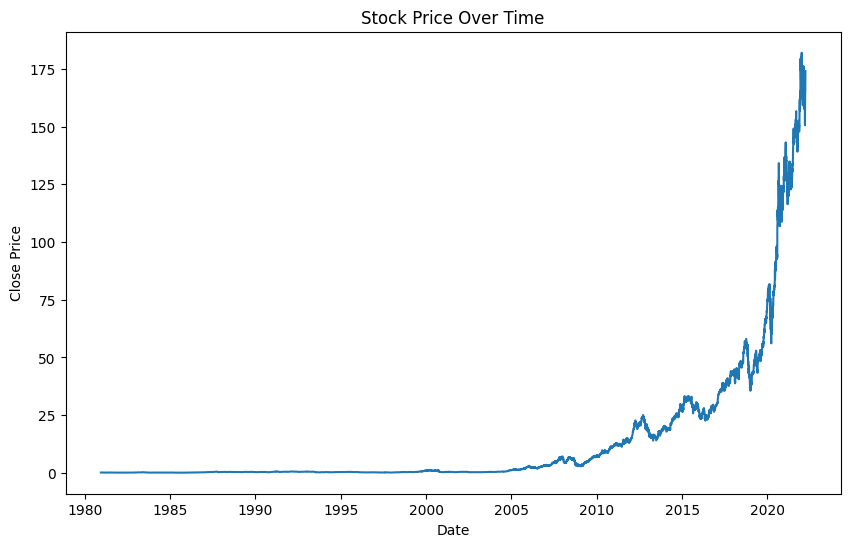

In [ ]:
# Load dataset
data = pd.read_csv('/content/AAPL.csv', usecols=['Date', 'Close'])
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Plot the closing price
plt.figure(figsize=(10,6))
plt.plot(data['Close'])
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [ ]:
# Prepare data for scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Define training data size
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [ ]:
# Function to create sequences for the RNN
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

# Choose sequence length (e.g., 60 days)
sequence_length = 60

# Prepare training and test data
x_train, y_train = create_sequences(train_data, sequence_length)
x_test, y_test = create_sequences(test_data, sequence_length)

# Reshape the data to be [samples, time steps, features] for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


USING LSTM

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - loss: 1.3154e-04
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - loss: 2.5110e-06
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 2.2892e-06
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 2.2324e-06
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - loss: 2.1040e-06
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - loss: 2.1033e-06
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 2.0448e-06
Epoch 8/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - loss: 1.4660e-06
Epoch 9/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - loss: 1.7212e-06
Epoch 10/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - loss: 1.5728e-06


64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


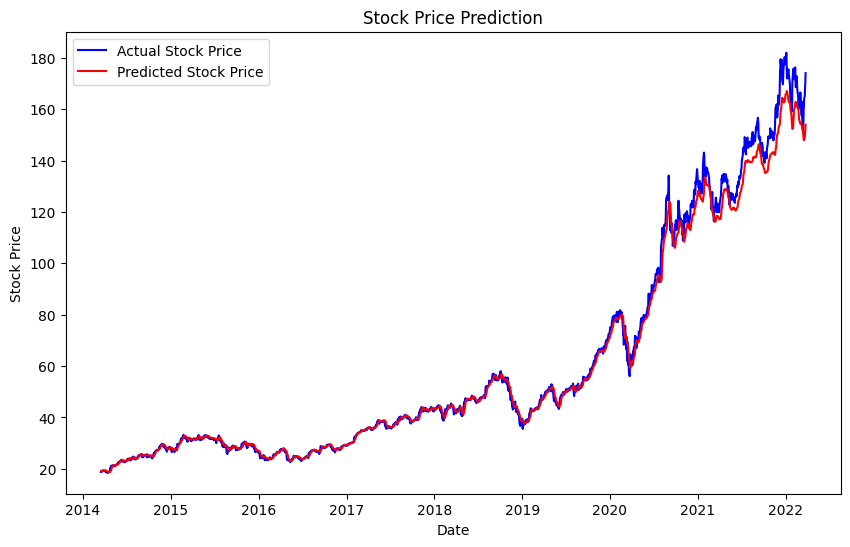

Mean Squared Error: 15.102857931324005


In [ ]:
# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(data.index[train_size + sequence_length:], scaler.inverse_transform(test_data[sequence_length:]), color='blue', label='Actual Stock Price')
plt.plot(data.index[train_size + sequence_length:], predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(scaler.inverse_transform(test_data[sequence_length:]), predictions)
print(f'Mean Squared Error: {mse}')


USING GRU

In [ ]:
from tensorflow.keras.layers import GRU

# Build the GRU model
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(GRU(units=50))
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 24s 71ms/step - loss: 6.3390e-05
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - loss: 1.4300e-06
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - loss: 1.1818e-06
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - loss: 1.7080e-06
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - loss: 1.6689e-06
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 22s 82ms/step - loss: 9.5039e-07
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 38s 72ms/step - loss: 1.6454e-06
Epoch 8/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - loss: 1.2859e-06
Epoch 9/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - loss: 1.0977e-06
Epoch 10/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 22s 76ms/step - loss: 1.0573e-06


64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


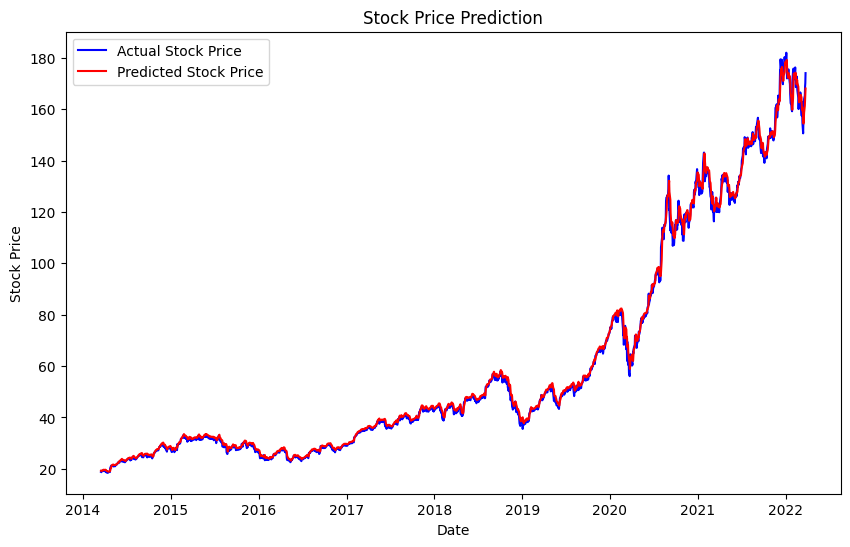

Mean Squared Error: 3.010004840591839


In [ ]:
# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(data.index[train_size + sequence_length:], scaler.inverse_transform(test_data[sequence_length:]), color='blue', label='Actual Stock Price')
plt.plot(data.index[train_size + sequence_length:], predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(scaler.inverse_transform(test_data[sequence_length:]), predictions)
print(f'Mean Squared Error: {mse}')


Bidirectional RNN

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM

# Build the Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(x_train.shape[1], 1)))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dense(units=1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=10, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 36s 109ms/step - loss: 5.7225e-05
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 28s 108ms/step - loss: 3.2185e-06
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 30s 114ms/step - loss: 2.3664e-06
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 28s 109ms/step - loss: 1.9674e-06
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - loss: 2.0587e-06
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - loss: 1.8306e-06
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - loss: 1.6528e-06
Epoch 8/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 28s 108ms/step - loss: 1.7469e-06
Epoch 9/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 44s 121ms/step - loss: 1.7019e-06
Epoch 10/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 38s 109ms/step - loss: 1.2291e-06


64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step


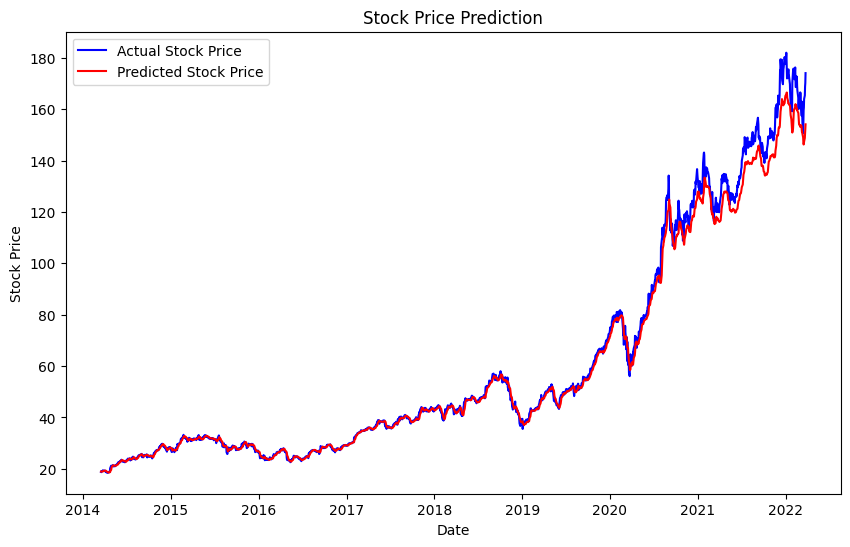

Mean Squared Error: 16.159856441751515


In [ ]:
# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(data.index[train_size + sequence_length:], scaler.inverse_transform(test_data[sequence_length:]), color='blue', label='Actual Stock Price')
plt.plot(data.index[train_size + sequence_length:], predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(scaler.inverse_transform(test_data[sequence_length:]), predictions)
print(f'Mean Squared Error: {mse}')


Vanilla RNN

In [ ]:
from tensorflow.keras.layers import SimpleRNN

# Build the Vanilla RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(SimpleRNN(units=50))
model.add(Dense(units=1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=10, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.0065
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 1.0078e-05
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 8.0445e-06
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 5.3025e-06
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 5.7632e-06
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 4.2221e-06
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 3.5047e-06
Epoch 8/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 4.1740e-06
Epoch 9/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 2.4967e-06
Epoch 10/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 2.8653e-06


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


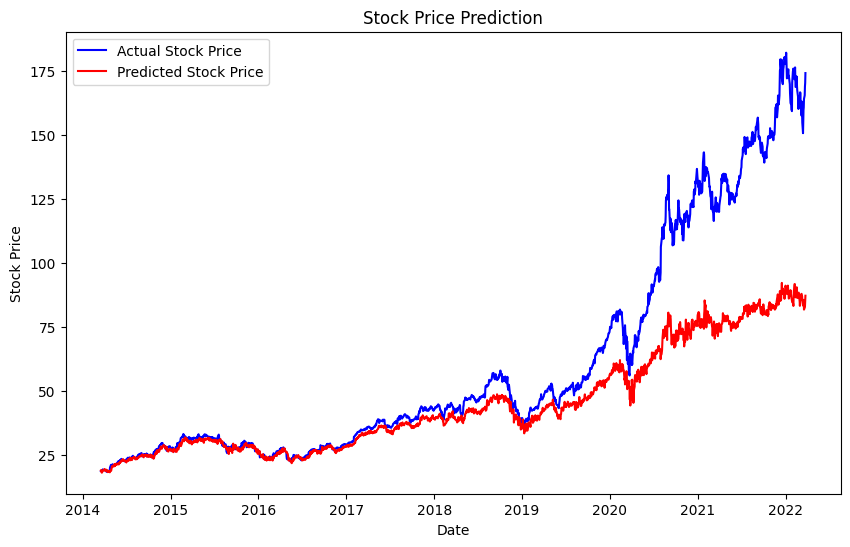

Mean Squared Error: 819.1099462639886


In [ ]:
# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(data.index[train_size + sequence_length:], scaler.inverse_transform(test_data[sequence_length:]), color='blue', label='Actual Stock Price')
plt.plot(data.index[train_size + sequence_length:], predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(scaler.inverse_transform(test_data[sequence_length:]), predictions)
print(f'Mean Squared Error: {mse}')
